# Mount Drive and Install 

In [3]:
#mount drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive

# list the contents of /mydrive
!ls /mydrive

#Navigate to /mydrive/mediapipe-main
%cd /mydrive/mediapipe-main

!pip install mediapipe
!pip install kaleido
!pip install PyQt5
!pip install IPython

/
Mounted at /content/gdrive
'2022-04-06 21-23.pdf'		    mediapipe-main
 ColabNB			   'My Drive'
'Colab Notebooks'		    Other
'Copy of Tumor_CNN_denoise.ipynb'   Tumor2
 Data-Viz			   'Untitled document.gdoc'
 DistCompSys			    videoplayback.mp4
 GSVPanoDepth.js-master		    videos
 Howells_bslevels.gsheet	    yolov4
 images
/content/gdrive/My Drive/mediapipe-main
     |████████████████████████████████| 32.7 MB 1.3 MB/s 
     |████████████████████████████████| 79.9 MB 106 kB/s 
     |████████████████████████████████| 8.3 MB 5.2 MB/s 
     |████████████████████████████████| 338 kB 61.2 MB/s 
     |████████████████████████████████| 59.9 MB 1.2 MB/s 


# Video to JPG

In [ ]:
# Imports - 14s for 8s video
import mediapipe as mp
import cv2
import datetime
import imutils
from google.colab import files
from google.colab.patches import cv2_imshow
import numpy as np

# Get video file from directory
video = 'images/waving.mp4'
cap = cv2.VideoCapture(video)

count = 0
# Save all images to new folder for image processing
while True:
  success,image = cap.read()
  cv2.imwrite("data/input/holistic/frame%d.jpg" % count, image)     # save frame as JPEG file      
  count += 1

error: ignored

# Facemesh

In [2]:
import mediapipe as mp
import cv2
import datetime
import imutils
from google.colab import files
from google.colab.patches import cv2_imshow
import numpy as np
import glob
import matplotlib.pyplot as plt
import os

# Read in folder containing images, store as dictionary: filename, image
dict_img = {name: cv2.imread(name) for name in glob.glob("data/input/face0.jpg")}
IMAGE_FILES = dict_img 

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh
drawing_spec = mp_drawing.DrawingSpec(color=(0,255,0),thickness=2, circle_radius=1)

# For static images:
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    
    for face_landmarks in results.multi_face_landmarks:
          #print('face_landmarks:', face_landmarks)
          mp_drawing.draw_landmarks(
              image=annotated_image,
              landmark_list=face_landmarks,
              connections=mp_face_mesh.FACEMESH_TESSELATION,
              landmark_drawing_spec=None,
              connection_drawing_spec=mp_drawing_styles
              .get_default_face_mesh_tesselation_style())
          mp_drawing.draw_landmarks(
              image=annotated_image,
              landmark_list=face_landmarks,
              connections=mp_face_mesh.FACEMESH_CONTOURS,
              landmark_drawing_spec=None,
              connection_drawing_spec=mp_drawing_styles
              .get_default_face_mesh_contours_style())
          mp_drawing.draw_landmarks(
              image=annotated_image,
              landmark_list=face_landmarks,
              connections=mp_face_mesh.FACEMESH_IRISES,
              landmark_drawing_spec=None,
              connection_drawing_spec=mp_drawing_styles
              .get_default_face_mesh_iris_connections_style())
          #cv2.imwrite('data/output/facemesh/annotated_face' + str(idx) + '.png', annotated_image)
          cv2_imshow(annotated_image)
          # Plot pose world landmarks.
          #mp_drawing.plot_landmarks(results.multi_face_landmarks, mp_face_mesh.FACEMESH_IRISES)

ModuleNotFoundError: ignored

In [ ]:
# Create GIF with Annotated images
from PIL import Image
import glob
 
# Create the frames
frames = []
imgs = glob.glob("data/output/facemesh/annotated_face*.png")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
 
# Save into a GIF file that loops once
frames[0].save('data/output/facemesh/facemesh_face.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=5, 
               loop=1,
               fps=30.0)

## FaceMesh Tesselation only

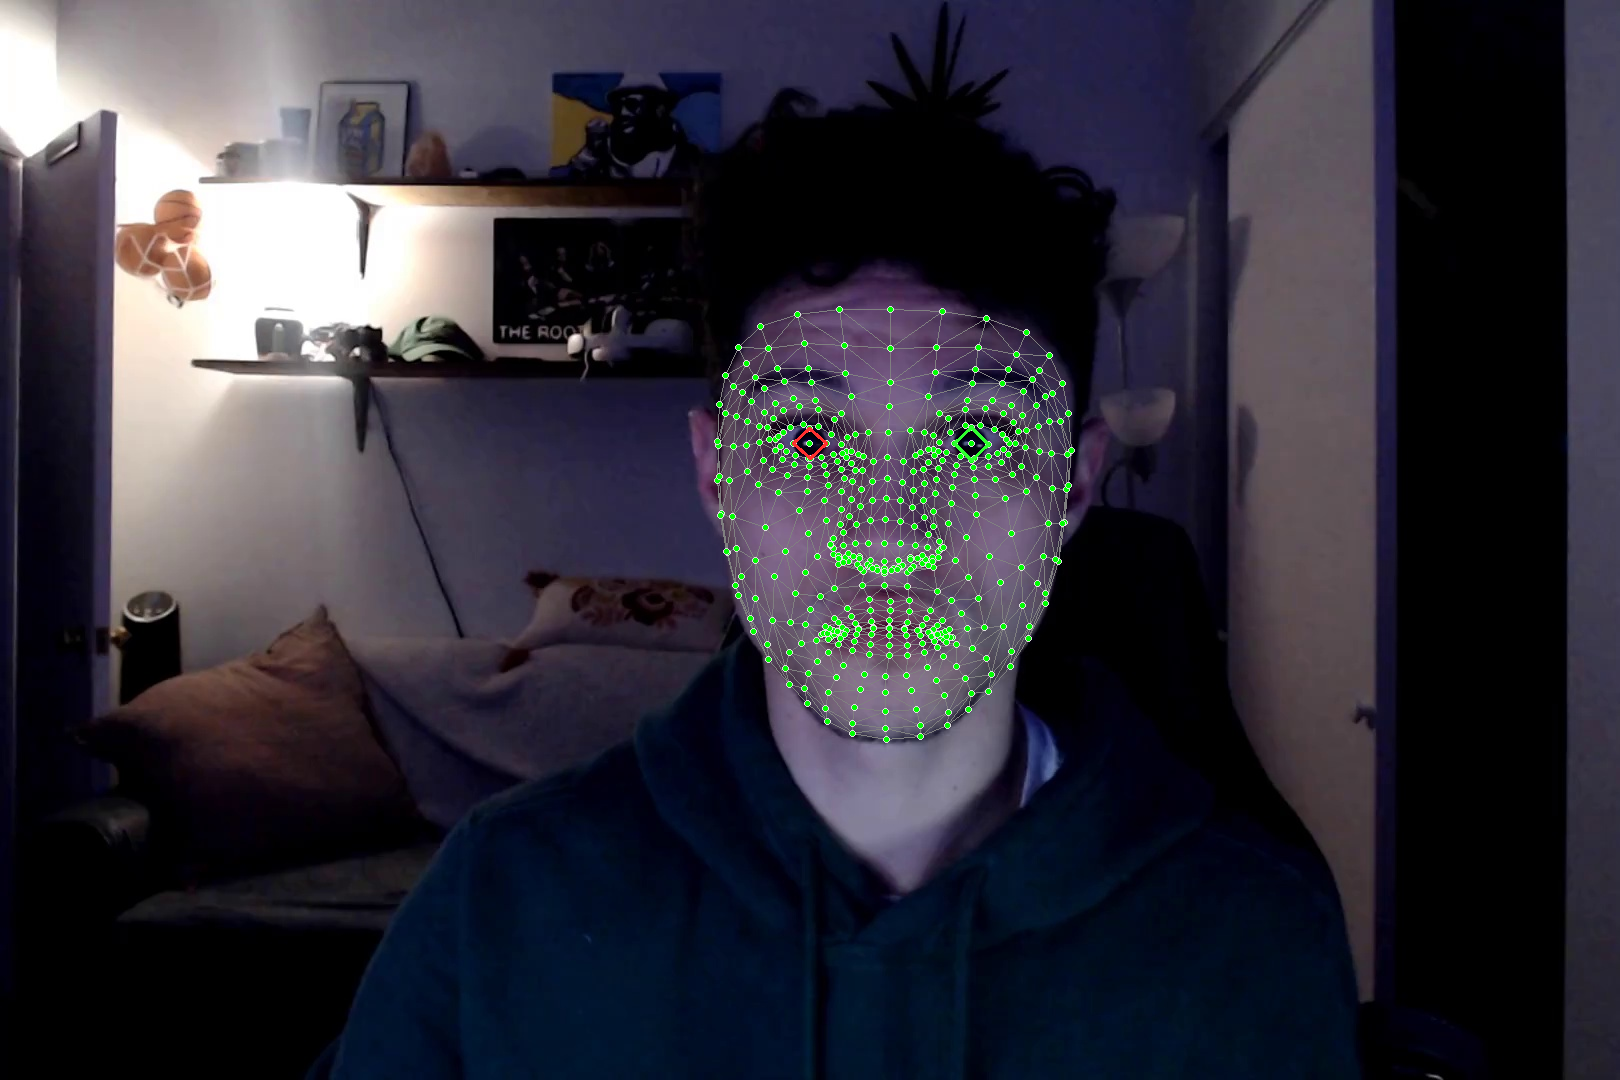

In [ ]:
import mediapipe as mp
import cv2
import datetime
import imutils
from google.colab import files
from google.colab.patches import cv2_imshow
import numpy as np
import glob
import matplotlib.pyplot as plt
import os

# Read in folder containing images, store as dictionary: filename, image
dict_img = {name: cv2.imread(name) for name in glob.glob("data/input/face0.jpg")}
IMAGE_FILES = dict_img 

mp_holistic = mp.solutions.holistic
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh
drawing_spec = mp_drawing.DrawingSpec(color=[0,255,0],thickness=2, circle_radius=1)
drawing_spec2 = mp_drawing.DrawingSpec(color=[255,0,0],thickness=2, circle_radius=1)

# For static images:
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:

  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    
    for face_landmarks in results.multi_face_landmarks:
          #print('face_landmarks:', face_landmarks)
          mp_drawing.draw_landmarks(
              image=annotated_image,
              landmark_list=results.multi_face_landmarks[0],
              connections=mp_face_mesh.FACEMESH_TESSELATION,
              landmark_drawing_spec=drawing_spec,
              connection_drawing_spec=mp_drawing_styles
              .get_default_face_mesh_tesselation_style())
          mp_drawing.draw_landmarks(
              image=annotated_image,
              landmark_list=face_landmarks,
              connections=mp_face_mesh.FACEMESH_IRISES,
              landmark_drawing_spec=None,
              connection_drawing_spec=mp_drawing_styles
              .get_default_face_mesh_iris_connections_style())
          #cv2.imwrite('data/output/facemesh/tesselation_only' + str(idx) + '.png', annotated_image)
          cv2_imshow(annotated_image)

In [ ]:
# Create GIF with Annotated images
from PIL import Image
import glob
 
# Create the frames
frames = []
imgs = glob.glob("data/output/facemesh/tesselation_only*.png")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
 
# Save into a GIF file that loops once
frames[0].save('data/output/facemesh/tesselation_only.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=5, 
               loop=1,
               fps=30.0)

# Holistic

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

_PRESENCE_THRESHOLD = 0.5
_VISIBILITY_THRESHOLD = 0.5

def plot_landmarks(counter,
    landmark_list,
    connections=None,
    ):
    
    if not landmark_list:
        return
    plotted_landmarks = {}
    for idx, landmark in enumerate(landmark_list.landmark):
        if (
            landmark.HasField("visibility")
            and landmark.visibility < _VISIBILITY_THRESHOLD
        ) or (
            landmark.HasField("presence") and landmark.presence < _PRESENCE_THRESHOLD
        ):
            continue
        plotted_landmarks[idx] = (-landmark.z, landmark.x, -landmark.y)
    if connections:
        out_cn = []
        num_landmarks = len(landmark_list.landmark)
        # Draws the connections if the start and end landmarks are both visible.
        for connection in connections:
            start_idx = connection[0]
            end_idx = connection[1]
            if not (0 <= start_idx < num_landmarks and 0 <= end_idx < num_landmarks):
                raise ValueError(
                    f"Landmark index is out of range. Invalid connection "
                    f"from landmark #{start_idx} to landmark #{end_idx}."
                )
            if start_idx in plotted_landmarks and end_idx in plotted_landmarks:
                landmark_pair = [
                    plotted_landmarks[start_idx],
                    plotted_landmarks[end_idx],
                ]
                out_cn.append(
                    dict(
                        xs=[landmark_pair[0][0], landmark_pair[1][0]],
                        ys=[landmark_pair[0][1], landmark_pair[1][1]],
                        zs=[landmark_pair[0][2], landmark_pair[1][2]],
                    )
                )
        cn2 = {"xs": [], "ys": [], "zs": []}
        for pair in out_cn:
            for k in pair.keys():
                cn2[k].append(pair[k][0])
                cn2[k].append(pair[k][1])
                cn2[k].append(None)

    df = pd.DataFrame(plotted_landmarks).T.rename(columns={0: "z", 1: "x", 2: "y"})
    df["lm"] = df.index.map(lambda s: mp_pose.PoseLandmark(s).name).values
    fig = (
        px.scatter_3d(df, x="z", y="x", z="y", hover_name="lm")
        .update_traces(marker={"color": "red"})
        .update_layout(
            margin={"l": 0, "r": 0, "t": 0, "b": 0},
            scene={"camera": {"eye": {"x": 2.1, "y": 0, "z": 0}}},
        )
    )
    fig.add_traces(
        [
            go.Scatter3d(
                x=cn2["xs"],
                y=cn2["ys"],
                z=cn2["zs"],
                mode="lines",
                line={"color": "black", "width": 5},
                name="connections",
            )
        ]
    )

    return fig.show()
    #return fig
    #return fig.write_image("data/output/holistic/scatter" + str(counter) + ".png")


In [ ]:
!pip install git+https://github.com/AssemblyAI-Examples/mediapipe-python.git

  Cloning https://github.com/AssemblyAI-Examples/mediapipe-python.git to /tmp/pip-req-build-3dh5l1sm
  Running command git clone -q https://github.com/AssemblyAI-Examples/mediapipe-python.git /tmp/pip-req-build-3dh5l1sm
ERROR: File "setup.py" not found for legacy project git+https://github.com/AssemblyAI-Examples/mediapipe-python.git.


Nose coordinates: (555.0245976448059, 611.7135429382324)


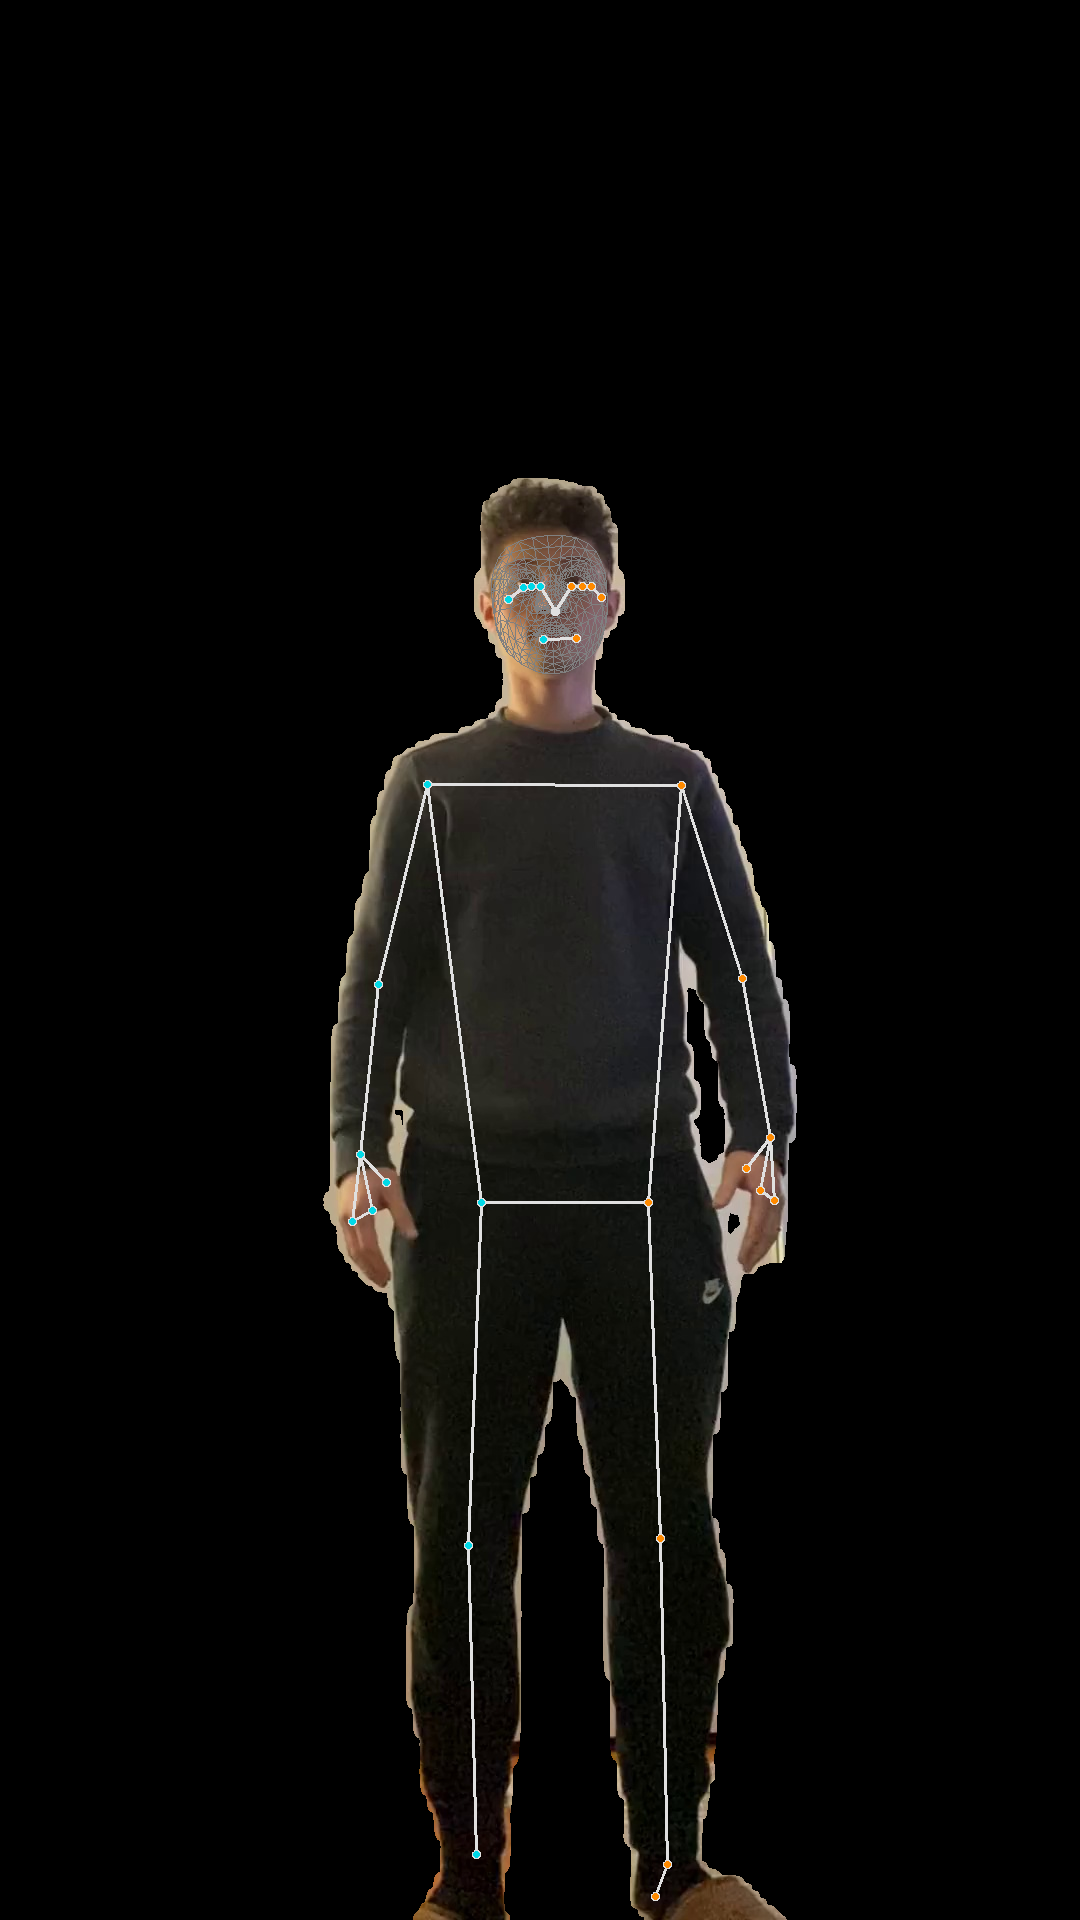

AttributeError: ignored

In [ ]:
import mediapipe as mp
import cv2
import datetime
import imutils
from google.colab import files
from google.colab.patches import cv2_imshow
import numpy as np
import glob
import matplotlib.pyplot as plt
import os
import time
import nb_helpers

# Read in folder containing images, store as dictionary: filename, image
dict_img = {name: cv2.imread(name) for name in glob.glob("data/input/holistic/frame0.jpg")}
IMAGE_FILES = dict_img 

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic
mp_pose = mp.solutions.pose
mp_face_mesh = mp.solutions.face_mesh
drawing_spec = mp_drawing.DrawingSpec(color=(0,255,0),thickness=1, circle_radius=1)
mp.solutions.pose.PoseLandmark

# For static images:
with mp_holistic.Holistic(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    refine_face_landmarks=True) as holistic:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if results.pose_landmarks:
      print(
          f'Nose coordinates: ('
          f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x * image_width}, '
          f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y * image_height})'
      )

    annotated_image = image.copy()

    # Draw segmentation on the image.
    # To improve segmentation around boundaries, consider applying a joint
    # bilateral filter to "results.segmentation_mask" with "image".
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    bg_image = np.zeros(image.shape, dtype=np.uint8)
    #bg_image[:] = BG_COLOR
    annotated_image = np.where(condition, annotated_image, bg_image)

    # Draw pose, left and right hands, and face landmarks on the image.
    mp_drawing.draw_landmarks(
        annotated_image,
        results.face_landmarks,
        mp_holistic.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_tesselation_style())
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_holistic.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.
        get_default_pose_landmarks_style())
    
    cv2_imshow(annotated_image)
    #cv2.imwrite('data/output/holistic/annotated' + str(idx) + '.png', annotated_image)

    # Plot pose world landmarks.
    plot_landmarks(idx, results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
    #cv2.imwrite('data/output/holistic/scatter' + str(idx) + '.png', scatter)




# Post image process
pose_connections = mp.solutions.pose.POSE_CONNECTIONS
mp_pose = mp.solutions.pose
poselandmarks_list = nb_helpers.poselandmarks_list


num = 0
for i in mp_holistic.POSE_CONNECTIONS:
    if num < 5:
        print(poselandmarks_list[i[0]], '-->', poselandmarks_list[i[1]])
    else:
        break
    num += 1

# Create a 3x33 array to store XYZ data for 33 landmarks
data = np.empty((3, len(mp_holistic.PoseLandmark)))

# Store the XYZ data for each landmark
landmarks = results.pose_world_landmarks.landmark
for i in range(len(mp_holistic.PoseLandmark)):
    data[:, i] = (landmarks[i].x, landmarks[i].y, landmarks[i].z)   

# Plot the data
fig = plt.figure()
fig.set_size_inches(5, 5, True)
ax = fig.add_subplot(projection='3d')

nb_helpers.plot_data(data, ax)
nb_helpers.scale_axes(ax)

# Save a rotation animation of the data
filename = 'pose_rotation.mp4'
nb_helpers.rotate_and_save(fig, ax, filename, save=True)


In [ ]:
# Create GIF with Annotated images
from PIL import Image
import glob
 
# Create the frames
frames = []
imgs = glob.glob("data/output/holistic/scatter*.png")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
 
# Save into a GIF file that loops forever
frames[0].save('data/output/holistic/scatter_pngs.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=8, loop=1)

# AssemblyAI

In [ ]:
!pip install IPython

In [ ]:
import cv2
import mediapipe as mp
import urllib.request
import numpy as np
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation
import PyQt5
from PIL import Image
#from IPython.display import Video
import nb_helpers

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic
mp_pose = mp.solutions.pose
mp_face_mesh = mp.solutions.face_mesh

# Download the necessary video
url = 'https://github.com/AssemblyAI-Examples/mediapipe-python/blob/main/walking.mp4?raw=true'
urllib.request.urlretrieve(url, 'walking.mp4') 

# Specify the video filename and create a `Pose` object as before
file = 'walking.mp4'
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:

	# Create VideoCapture object
    cap = cv2.VideoCapture(file)

	# Raise error if file cannot be opened
    if cap.isOpened() == False:
        print("Error opening video stream or file")
        raise TypeError

	# Get the number of frames in the video
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Create a NumPy array to store the pose data as before
    # The shape is 3x33x144 - 3D XYZ data for 33 landmarks across 144 frames
    data = np.empty((3, len(poselandmarks_list), length))    
    
	# For each image in the video, extract the spatial pose data and save it in the appropriate spot in the `data` array 
    frame_num = 0
    while cap.isOpened():
        ret, image = cap.read()
        if not ret:
            break

        image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
        results = pose.process(image)
        
        landmarks = results.pose_world_landmarks.landmark
        for i in range(len(mp_pose.PoseLandmark)):
            data[:, i, frame_num] = (landmarks[i].x, landmarks[i].y, landmarks[i].z)  
        
        frame_num += 1
    
    # Close the video file
    cap.release()

NameError: ignored

In [ ]:
fig = plt.figure()
fig.set_size_inches(5, 5, True)
ax = fig.add_subplot(projection='3d')

anim = nb_helpers.time_animate(data, fig, ax)

# Save
anim.save('walking_wireframe.mp4', fps=30, extra_args=['-vcodec', 'libx264'], dpi=300)

# 3D detect boundary

In [ ]:
import mediapipe as mp
import cv2
import datetime
import imutils
from google.colab import files
from google.colab.patches import cv2_imshow
import numpy as np
import glob
import matplotlib.pyplot as plt
import os

# Read images with OpenCV.
dict_img = {name: cv2.imread(name) for name in glob.glob("data/input/frame*.jpg")}

# For static images:
IMAGE_FILES = dict_img

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_objectron = mp.solutions.objectron

with mp_objectron.Objectron(static_image_mode=True,
                            max_num_objects=5,
                            min_detection_confidence=0.5,
                            model_name='Cup') as objectron:
  
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    # Convert the BGR image to RGB and process it with MediaPipe Objectron.
    results = objectron.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw box landmarks.
    if not results.detected_objects:
      print(f'No box landmarks detected on {file}')
      continue
    print(f'Box landmarks of {file}:')

    annotated_image = image.copy()
    
    for detected_object in results.detected_objects:
      mp_drawing.draw_landmarks(annotated_image, detected_object.landmarks_2d, mp_objectron.BOX_CONNECTIONS)
      mp_drawing.draw_axis(annotated_image, detected_object.rotation, detected_object.translation)
      cv2.imwrite('data/output/3D_detect_boundary/annotated' + str(idx) + '.png', annotated_image)

In [ ]:
# Create GIF with Annotated images
from PIL import Image
import glob
 
# Create the frames
frames = []
imgs = glob.glob("data/output/3D_detect_boundary/*.png")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
 
# Save into a GIF file that loops forever
frames[0].save('data/output/3D_detect_boundary/3Ddetect.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=8, loop=0)

# Next